## Objected-Oriented Programming
A method for organizing modular programming.
- Abstraction barriers
- Bundling together information and related behavior   

A metaphor for computation using distributed state
- Each object has its own local state
- Each object knows how to manage its own local state, based on method calls.
- Method calls are messages passed betwwen objects.
- Several objects may all be the same type.
- Different types may be related to each other.     

Specialized syntax & vocabulary to support this metaphpor

### Objects and Classes
Every object is an instance of a particular class.   
A class serves as a template for its instances.       
*Instantiating* the class: to create a new object instance.   
*Instance attributes(fields, properties,instance var)*: attributes specific to a particular object.

*Methods*: functions that operate on the object or perform object-specific computations.    
We *invoke* the methods on an object.

### Defining Classes
Class statement:
```python
class <name>:
    <suite>
```
- A new class is created and is bound to `<name>` in the first frame of the current env
- The `<suite>` is executed then.
`def` & assignment, create or modify **attributes** of the class.




In [1]:
class Clown:
    nose = 'big and red'
    def dance():
        return 'No thanks'
Clown.nose

'big and red'

In [2]:
Clown.dance()

'No thanks'

#### Object Construction
When a class is called:
1. A new instance of that class is created
2. The `__init__` method is called with the new object as its first argument `self`, with any additional arguments in the call expression.

The *constructor* of the class: `__init__`, the method **specifying the instance attributes**, initializing new objects.


#### Object Identity
Every object that is an instance of a user-defined class has a unique identity.
Identity operators `is` and `is not`.

#### Methods
Methods are functions defined in the suite of a class statement.
These def statements create function objects as always, but their names are bound as **attributes of the class**.

In [21]:
class Account:
    def __init__(self, account_holder):
        self.holder = account_holder
        self.balance = 0
    def deposit(self, amount):
        self.balance = self.balance + amount
        return self.balance
    def withdraw(self, amount):
        if amount > self.balance:
            return 'Insufficient funds'
        self.balance = self.balance - amount
        return self.balance


All invoked methods have access to the object via the `self` parameter, so they can access and manipulate the object's state. 

**Dot Expression**   
Objects receive messages via dot notation.    
Dot notation accesses attributes of the instance or its class.
```Python
<expression>.<name>
```     
- `<expression>`: any valid Python expression.
- `<name>`: a simple name      
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!    
The central idea in message passing was that **data values should have behavior by responding to messages that are relevant to the abstract type they represent**. Dot notation is a syntactic feature of Python that formalizes the message passing metaphor. The advantage of using a language with a built-in object system is that message passing can interact seamlessly with other language features, such as assignment statements. We do not require different messages to "get" or "set" the value associated with a local attribute name; the language syntax allows us to use the message name directly.

### Methods and Functions
Object + Function = Bound Method   
Functions are objects.   
Bound methods are also objects: functions that has its first parameter "self" already bound to an instance.

The attributes of an object:   
- instance attributes
- class attributes(including methods)   
Methods are attributes of the class that require special handling.
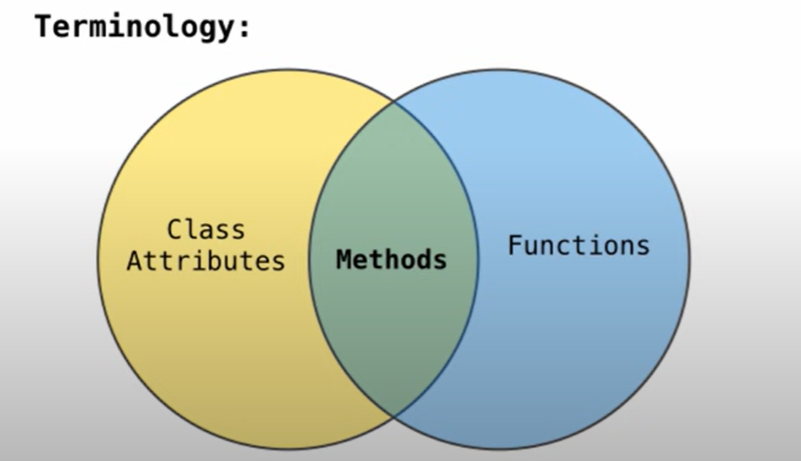

In [6]:
type(Account.deposit)

function

In [26]:
getattr(Account, 'deposit')

<function __main__.Account.deposit(self, amount)>

In [7]:
type(john.deposit)

method

In [27]:
getattr(john, 'deposit')

<bound method Account.deposit of <__main__.Account object at 0x000002BC5F82E810>>

In [11]:
type(Account.balance)

AttributeError: type object 'Account' has no attribute 'balance'

In [10]:
type(john.balance)

int

In [24]:
Account.deposit(john, 1001)#Function

1001

In [25]:
john.deposit(1000)#bound method

2001

### Attributes
All objects have attributes.
e.g. class attributes, instance attributes
Using `getattr`, we can look up an attribute using a string.      
`getattr` and dot expression look up a name in the same way.

In [22]:
john = Account('John')
getattr(john, 'balance')


0

In [23]:
hasattr(john, 'balance')

True

#### Name Convention
- Class: CamelCase
- Method: a_function
- Instance vairiables and methods that should only be accessed within the methods: underscores

#### Class Attributes
Class attributes are "shared" across all instances of a class,  created by assignment statements.


In [30]:
class Account:
    interest = 0.02

    def __init__(self, account_holder):
        self.holder = account_holder
        self.balance = 0

In [31]:
tom_account = Account('Tom')
jim_account = Account('Jim')
tom_account.interest

0.02

In [32]:
jim_account.interest

0.02

In [33]:
Account.interest = 0.04
tom_account.interest

0.04

#### Looking up Attributes by Name
```python
<expression>.<name>
```
To evaluate a dot expression:    
1. Evaluate the `<expression>`, which yields the object of the dot expression.
2. `<name>` is matched against the instance attributes of that object; **if an attribute with that name exists**, its value is returned.
3. If not, `<name>` is looked up in the class, which yields a class attribute value.
4. If the value is not a function, it is returned. Or a bound method is returned.


#### Attribute assignment
Assignment statements with a dot expression on the left side affect attributes for the object of that dot expression.  
- object(instance), sets instance attributes
- object(class), sets class attributes

In [34]:
tom_account.interest = 0.08

Created a new instance attribute, thus it is looked up first in the instance scale.

In [35]:
tom_account.interest

0.08

In [36]:
jim_account.interest

0.04